In [6]:
import pandas as pd

# Load the data
file_path = "/Users/wenjing/Downloads/Capstone/10_stocks_filtered_scored.csv"
df = pd.read_csv(file_path)

# Ensure 'Date' only includes the date (no time)
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Calculate combined_sentiment_score and weighted_sentiment_score
def calculate_scores(group):
    combined_score = (group['sentiment_label'] == 'positive').sum() - (group['sentiment_label'] == 'negative').sum()
    weighted_score = group.apply(
        lambda row: row['sentiment_score'] if row['sentiment_label'] == 'positive' 
        else (-row['sentiment_score'] if row['sentiment_label'] == 'negative' else 0),
        axis=1
    ).sum()
    return pd.Series({
        'combined_sentiment_score': combined_score,
        'weighted_sentiment_score': weighted_score
    })

# Group by 'Date' and 'Stock_symbol' and calculate the scores
result_df = df.groupby(['Date', 'Stock_symbol']).apply(calculate_scores).reset_index()

# Save the resulting dataframe
output_path = "/Users/wenjing/Downloads/Capstone/processed_stocks_filtered_scored.csv"
result_df.to_csv(output_path, index=False)



/var/folders/z8/1bf58b0x31xb_r9dnkm4w93c0000gn/T/ipykernel_72329/235875128.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby(['Date', 'Stock_symbol']).apply(calculate_scores).reset_index()


In [7]:
import pandas as pd
import os

# Load the sentiment data file (update path if necessary)
sentiment_data_path = '/Users/wenjing/Downloads/Capstone/processed_stocks_filtered_scored.csv'
sentiment_df = pd.read_csv(sentiment_data_path)

# Convert the Date column in sentiment data to datetime format and remove timezone
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.tz_localize(None)

# Path to the full history and output directories
price_files_dir = '/Users/wenjing/Downloads/Capstone/full_history/'
output_dir = '/Users/wenjing/Downloads/Capstone/combined/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List of unique stock symbols in the sentiment data
stock_symbols = sentiment_df['Stock_symbol'].unique()

# Loop through each stock symbol and process its data
for symbol in stock_symbols:
    # Path to the price file for the current stock symbol
    price_file_path = os.path.join(price_files_dir, f'{symbol}.csv')
    
    # Check if the price file exists for the stock symbol
    if os.path.exists(price_file_path):
        # Load the price data for the current stock symbol
        price_df = pd.read_csv(price_file_path)
        
        # Rename and convert the date column in price data to a uniform format and remove timezone
        price_df.rename(columns={'date': 'Date'}, inplace=True)
        price_df['Date'] = pd.to_datetime(price_df['Date']).dt.tz_localize(None)
        
        # Filter the sentiment data for the current stock symbol
        sentiment_stock_df = sentiment_df[sentiment_df['Stock_symbol'] == symbol]
        
        # Merge the price data with the sentiment data on Date
        merged_df = pd.merge(price_df, sentiment_stock_df, how='left', on='Date')
        
        # Save the combined DataFrame to a new CSV file
        output_path = os.path.join(output_dir, f'{symbol}.csv')
        merged_df.to_csv(output_path, index=False)
        
        print(f'Saved combined data for {symbol} to {output_path}')
    else:
        print(f'Price file for {symbol} not found. Skipping...')



Saved combined data for MRK to /Users/wenjing/Downloads/Capstone/combined_weighted/MRK.csv
Saved combined data for AMD to /Users/wenjing/Downloads/Capstone/combined_weighted/AMD.csv
Saved combined data for INTC to /Users/wenjing/Downloads/Capstone/combined_weighted/INTC.csv
Saved combined data for BA to /Users/wenjing/Downloads/Capstone/combined_weighted/BA.csv
Saved combined data for GOOG to /Users/wenjing/Downloads/Capstone/combined_weighted/GOOG.csv
Saved combined data for NVDA to /Users/wenjing/Downloads/Capstone/combined_weighted/NVDA.csv
Saved combined data for MSFT to /Users/wenjing/Downloads/Capstone/combined_weighted/MSFT.csv
Saved combined data for TSLA to /Users/wenjing/Downloads/Capstone/combined_weighted/TSLA.csv
Saved combined data for AAPL to /Users/wenjing/Downloads/Capstone/combined_weighted/AAPL.csv


In [9]:
import pandas as pd

# Load the data
file_path = "/Users/wenjing/Downloads/Capstone/10_stocks_filtered.csv"
df = pd.read_csv(file_path)

# Ensure 'Date' only includes the date part (no time)
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Filter rows where Date is 2023-12-16 and Stock_symbol is AAPL
filtered_df = df[(df['Date'] == pd.to_datetime('2023-12-05').date()) & (df['Stock_symbol'] == 'AAPL')]

# Save or display the filtered dataframe
output_path = "/Users/wenjing/Downloads/Capstone/filtered_2023_12_05_AAPL.csv"
filtered_df.to_csv(output_path, index=False)



In [10]:
import pandas as pd
import os

# Path to the combined directory
combined_dir = '/Users/wenjing/Downloads/Capstone/combined_weighted/'
output_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_weighted/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Iterate through each file in the combined directory
for filename in os.listdir(combined_dir):
    if filename.endswith('.csv'):
        # Load the CSV file
        file_path = os.path.join(combined_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Determine the minimum and maximum dates where Stock_symbol is not NaN
        min_date = df.loc[df['Stock_symbol'].notna(), 'Date'].min()
        max_date = df.loc[df['Stock_symbol'].notna(), 'Date'].max()

        # Filter the DataFrame to keep only rows within this date range
        filtered_df = df[(df['Date'] >= min_date) & (df['Date'] <= max_date)]

        # Reset index for a cleaner DataFrame
        filtered_df = filtered_df.reset_index(drop=True)

        # Save the filtered DataFrame to the output directory
        output_path = os.path.join(output_dir, filename)
        filtered_df.to_csv(output_path, index=False)

        print(f'Saved filtered data for {filename} to {output_path}')


Saved filtered data for BA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/BA.csv
Saved filtered data for MRK.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/MRK.csv
Saved filtered data for INTC.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/INTC.csv
Saved filtered data for MSFT.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/MSFT.csv
Saved filtered data for AMD.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/AMD.csv
Saved filtered data for NVDA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/NVDA.csv
Saved filtered data for TSLA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/TSLA.csv
Saved filtered data for GOOG.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/GOOG.csv
Saved filtered data for AAPL.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted/AAPL.csv


In [11]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_weighted/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
    rmse = mean_squared_error(test, predictions, squared=False)
    return rmse, model_fit

# Prepare lists to store results
results = []

# Parameter grid for ARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(filename)
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = [
            'combined_sentiment_score'
        ]
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'close'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Grid search for best SARIMAX parameters (with sentiment features)
        best_rmse_with = float("inf")
        best_order_with = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=param)
                if rmse < best_rmse_with:
                    best_rmse_with = rmse
                    best_order_with = param
            except:
                continue

        # Grid search for best SARIMAX parameters (without sentiment features)
        best_rmse_without = float("inf")
        best_order_without = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=param)
                if rmse < best_rmse_without:
                    best_rmse_without = rmse
                    best_order_without = param
            except:
                continue

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


BA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MRK.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

INTC.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MSFT.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

AMD.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

NVDA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

TSLA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

GOOG.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

AAPL.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv                  3.094004                 (0, 0, 0)   
1   MRK.csv                  1.004375                 (0, 0, 1)   
2  INTC.csv                  0.695506                 (1, 0, 0)   
3  MSFT.csv                  4.133001                 (1, 0, 0)   
4   AMD.csv                  2.462425                 (0, 0, 0)   
5  NVDA.csv                  9.880934                 (1, 0, 0)   
6  TSLA.csv                  5.804030                 (1, 0, 1)   
7  GOOG.csv                  1.825127                 (0, 0, 0)   
8  AAPL.csv                  1.947525                 (0, 0, 0)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                     3.109099                    (0, 0, 0)  
1                     1.009790                    (0, 0, 1)  
2                     0.714006                    (0, 0, 1)  
3                     4.261750                    (1, 0, 0)  
4                  

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,3.094004,"(0, 0, 0)",3.109099,"(0, 0, 0)"
1,MRK.csv,1.004375,"(0, 0, 1)",1.009790,"(0, 0, 1)"
2,INTC.csv,0.695506,"(1, 0, 0)",0.714006,"(0, 0, 1)"
3,MSFT.csv,4.133001,"(1, 0, 0)",4.261750,"(1, 0, 0)"
4,AMD.csv,2.462425,"(0, 0, 0)",2.487848,"(0, 0, 0)"
5,NVDA.csv,9.880934,"(1, 0, 0)",9.898564,"(0, 0, 1)"
6,TSLA.csv,5.804030,"(1, 0, 1)",6.015946,"(1, 0, 1)"
7,GOOG.csv,1.825127,"(0, 0, 0)",1.681465,"(0, 0, 1)"
8,AAPL.csv,1.947525,"(0, 0, 0)",1.873778,"(0, 0, 1)"


In [13]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_weighted/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
    rmse = mean_squared_error(test, predictions, squared=False)
    return rmse, model_fit

# Prepare lists to store results
results = []

# Parameter grid for ARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(filename)
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = [
            'weighted_sentiment_score'
        ]
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'close'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Grid search for best SARIMAX parameters (with sentiment features)
        best_rmse_with = float("inf")
        best_order_with = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=param)
                if rmse < best_rmse_with:
                    best_rmse_with = rmse
                    best_order_with = param
            except:
                continue

        # Grid search for best SARIMAX parameters (without sentiment features)
        best_rmse_without = float("inf")
        best_order_without = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=param)
                if rmse < best_rmse_without:
                    best_rmse_without = rmse
                    best_order_without = param
            except:
                continue

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


BA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MRK.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

INTC.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MSFT.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

AMD.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

NVDA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

TSLA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

GOOG.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

AAPL.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv                  3.086756                 (0, 0, 0)   
1   MRK.csv                  1.003920                 (0, 0, 1)   
2  INTC.csv                  0.693067                 (1, 0, 0)   
3  MSFT.csv                  4.106258                 (1, 0, 0)   
4   AMD.csv                  2.458942                 (0, 0, 0)   
5  NVDA.csv                  9.864195                 (1, 0, 0)   
6  TSLA.csv                  5.806763                 (0, 0, 1)   
7  GOOG.csv                  1.885562                 (0, 0, 0)   
8  AAPL.csv                  1.942265                 (1, 0, 0)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                     3.109099                    (0, 0, 0)  
1                     1.009790                    (0, 0, 1)  
2                     0.714006                    (0, 0, 1)  
3                     4.261750                    (1, 0, 0)  
4                  

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,3.086756,"(0, 0, 0)",3.109099,"(0, 0, 0)"
1,MRK.csv,1.003920,"(0, 0, 1)",1.009790,"(0, 0, 1)"
2,INTC.csv,0.693067,"(1, 0, 0)",0.714006,"(0, 0, 1)"
3,MSFT.csv,4.106258,"(1, 0, 0)",4.261750,"(1, 0, 0)"
4,AMD.csv,2.458942,"(0, 0, 0)",2.487848,"(0, 0, 0)"
5,NVDA.csv,9.864195,"(1, 0, 0)",9.898564,"(0, 0, 1)"
6,TSLA.csv,5.806763,"(0, 0, 1)",6.015946,"(1, 0, 1)"
7,GOOG.csv,1.885562,"(0, 0, 0)",1.681465,"(0, 0, 1)"
8,AAPL.csv,1.942265,"(1, 0, 0)",1.873778,"(0, 0, 1)"


In [15]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_weighted/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
    rmse = mean_squared_error(test, predictions, squared=False)
    return rmse, model_fit

# Prepare lists to store results
results = []

# Parameter grid for ARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(filename)
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = [
            'combined_sentiment_score',
            'weighted_sentiment_score'
        ]
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'close'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Grid search for best SARIMAX parameters (with sentiment features)
        best_rmse_with = float("inf")
        best_order_with = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=param)
                if rmse < best_rmse_with:
                    best_rmse_with = rmse
                    best_order_with = param
            except:
                continue

        # Grid search for best SARIMAX parameters (without sentiment features)
        best_rmse_without = float("inf")
        best_order_without = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=param)
                if rmse < best_rmse_without:
                    best_rmse_without = rmse
                    best_order_without = param
            except:
                continue

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


BA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MRK.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

INTC.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MSFT.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

AMD.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

NVDA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

TSLA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

GOOG.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

AAPL.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv                  3.092264                 (0, 0, 0)   
1   MRK.csv                  1.003990                 (0, 0, 1)   
2  INTC.csv                  0.702027                 (1, 0, 0)   
3  MSFT.csv                  4.035924                 (1, 0, 1)   
4   AMD.csv                  2.472538                 (0, 0, 0)   
5  NVDA.csv                  9.873820                 (1, 0, 0)   
6  TSLA.csv                  5.846882                 (0, 0, 1)   
7  GOOG.csv                  1.986553                 (0, 0, 0)   
8  AAPL.csv                  1.935128                 (1, 0, 0)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                     3.109099                    (0, 0, 0)  
1                     1.009790                    (0, 0, 1)  
2                     0.714006                    (0, 0, 1)  
3                     4.261750                    (1, 0, 0)  
4                  

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,3.092264,"(0, 0, 0)",3.109099,"(0, 0, 0)"
1,MRK.csv,1.003990,"(0, 0, 1)",1.009790,"(0, 0, 1)"
2,INTC.csv,0.702027,"(1, 0, 0)",0.714006,"(0, 0, 1)"
3,MSFT.csv,4.035924,"(1, 0, 1)",4.261750,"(1, 0, 0)"
4,AMD.csv,2.472538,"(0, 0, 0)",2.487848,"(0, 0, 0)"
5,NVDA.csv,9.873820,"(1, 0, 0)",9.898564,"(0, 0, 1)"
6,TSLA.csv,5.846882,"(0, 0, 1)",6.015946,"(1, 0, 1)"
7,GOOG.csv,1.986553,"(0, 0, 0)",1.681465,"(0, 0, 1)"
8,AAPL.csv,1.935128,"(1, 0, 0)",1.873778,"(0, 0, 1)"


In [17]:
import pandas as pd

# Load the data
file_path = "/Users/wenjing/Downloads/Capstone/processed_stocks_filtered_scored.csv"
df = pd.read_csv(file_path)

# Ensure 'Date' is datetime and contains only the date part
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Function to shift weekend dates to the following Monday
def adjust_to_weekday(date):
    weekday = date.weekday()
    if weekday == 5:  # Saturday
        return date + pd.Timedelta(days=2)
    elif weekday == 6:  # Sunday
        return date + pd.Timedelta(days=1)
    else:
        return date

# Apply the adjustment
df['Adjusted_Date'] = df['Date'].apply(adjust_to_weekday)

# Save the updated dataframe
output_path = "/Users/wenjing/Downloads/Capstone/adjusted_stocks_filtered_scored.csv"
df.to_csv(output_path, index=False)


In [18]:
import pandas as pd

# Load the data
file_path = "/Users/wenjing/Downloads/Capstone/processed_stocks_filtered_scored.csv"
df = pd.read_csv(file_path)

# Ensure 'Date' is datetime and contains only the date part
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Function to shift weekend dates to the following Monday
def adjust_to_weekday(date):
    weekday = date.weekday()
    if weekday == 5:  # Saturday
        return date + pd.Timedelta(days=2)
    elif weekday == 6:  # Sunday
        return date + pd.Timedelta(days=1)
    else:
        return date

# Adjust dates to the following weekday if they fall on a weekend
df['Adjusted_Date'] = df['Date'].apply(adjust_to_weekday)

# Combine scores for the same Adjusted_Date and Stock_symbol
aggregated_df = df.groupby(['Adjusted_Date', 'Stock_symbol']).agg({
    'combined_sentiment_score': 'sum',
    'weighted_sentiment_score': 'sum'
}).reset_index()

# Drop the original 'Date' column and rename 'Adjusted_Date' to 'Date'
aggregated_df.rename(columns={'Adjusted_Date': 'Date'}, inplace=True)

# Save the resulting dataframe
output_path = "/Users/wenjing/Downloads/Capstone/final_adjusted_stocks_filtered_scored.csv"
aggregated_df.to_csv(output_path, index=False)


In [22]:
import pandas as pd
import os

# Load the sentiment data file (update path if necessary)
sentiment_data_path = '/Users/wenjing/Downloads/Capstone/final_adjusted_stocks_filtered_scored.csv'
sentiment_df = pd.read_csv(sentiment_data_path)

# Convert the Date column in sentiment data to datetime format and remove timezone
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.tz_localize(None)

# Path to the full history and output directories
price_files_dir = '/Users/wenjing/Downloads/Capstone/full_history/'
output_dir = '/Users/wenjing/Downloads/Capstone/combined_adjusted_date/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List of unique stock symbols in the sentiment data
stock_symbols = sentiment_df['Stock_symbol'].unique()

# Loop through each stock symbol and process its data
for symbol in stock_symbols:
    # Path to the price file for the current stock symbol
    price_file_path = os.path.join(price_files_dir, f'{symbol}.csv')
    
    # Check if the price file exists for the stock symbol
    if os.path.exists(price_file_path):
        # Load the price data for the current stock symbol
        price_df = pd.read_csv(price_file_path)
        
        # Rename and convert the date column in price data to a uniform format and remove timezone
        price_df.rename(columns={'date': 'Date'}, inplace=True)
        price_df['Date'] = pd.to_datetime(price_df['Date']).dt.tz_localize(None)
        
        # Filter the sentiment data for the current stock symbol
        sentiment_stock_df = sentiment_df[sentiment_df['Stock_symbol'] == symbol]
        
        # Merge the price data with the sentiment data on Date
        merged_df = pd.merge(price_df, sentiment_stock_df, how='left', on='Date')
        
        # Save the combined DataFrame to a new CSV file
        output_path = os.path.join(output_dir, f'{symbol}.csv')
        merged_df.to_csv(output_path, index=False)
        
        print(f'Saved combined data for {symbol} to {output_path}')
    else:
        print(f'Price file for {symbol} not found. Skipping...')



Saved combined data for MRK to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/MRK.csv
Saved combined data for AMD to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/AMD.csv
Saved combined data for INTC to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/INTC.csv
Saved combined data for BA to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/BA.csv
Saved combined data for GOOG to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/GOOG.csv
Saved combined data for NVDA to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/NVDA.csv
Saved combined data for MSFT to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/MSFT.csv
Saved combined data for TSLA to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/TSLA.csv
Saved combined data for AAPL to /Users/wenjing/Downloads/Capstone/combined_adjusted_date/AAPL.csv


In [23]:
import pandas as pd
import os

# Path to the combined directory
combined_dir = '/Users/wenjing/Downloads/Capstone/combined_adjusted_date/'
output_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Iterate through each file in the combined directory
for filename in os.listdir(combined_dir):
    if filename.endswith('.csv'):
        # Load the CSV file
        file_path = os.path.join(combined_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Determine the minimum and maximum dates where Stock_symbol is not NaN
        min_date = df.loc[df['Stock_symbol'].notna(), 'Date'].min()
        max_date = df.loc[df['Stock_symbol'].notna(), 'Date'].max()

        # Filter the DataFrame to keep only rows within this date range
        filtered_df = df[(df['Date'] >= min_date) & (df['Date'] <= max_date)]

        # Reset index for a cleaner DataFrame
        filtered_df = filtered_df.reset_index(drop=True)

        # Save the filtered DataFrame to the output directory
        output_path = os.path.join(output_dir, filename)
        filtered_df.to_csv(output_path, index=False)

        print(f'Saved filtered data for {filename} to {output_path}')


Saved filtered data for BA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/BA.csv
Saved filtered data for MRK.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/MRK.csv
Saved filtered data for INTC.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/INTC.csv
Saved filtered data for MSFT.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/MSFT.csv
Saved filtered data for AMD.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/AMD.csv
Saved filtered data for NVDA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/NVDA.csv
Saved filtered data for TSLA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/TSLA.csv
Saved filtered data for GOOG.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/GOOG.csv
Saved filtered data for AAPL.csv to /Users/wenji

In [24]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
    rmse = mean_squared_error(test, predictions, squared=False)
    return rmse, model_fit

# Prepare lists to store results
results = []

# Parameter grid for ARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(filename)
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = [
            'weighted_sentiment_score'
        ]
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'close'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Grid search for best SARIMAX parameters (with sentiment features)
        best_rmse_with = float("inf")
        best_order_with = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=param)
                if rmse < best_rmse_with:
                    best_rmse_with = rmse
                    best_order_with = param
            except:
                continue

        # Grid search for best SARIMAX parameters (without sentiment features)
        best_rmse_without = float("inf")
        best_order_without = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=param)
                if rmse < best_rmse_without:
                    best_rmse_without = rmse
                    best_order_without = param
            except:
                continue

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


BA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MRK.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

INTC.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MSFT.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

AMD.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

NVDA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

TSLA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

GOOG.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

AAPL.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv                  3.091512                 (0, 0, 0)   
1   MRK.csv                  1.003261                 (1, 0, 0)   
2  INTC.csv                  0.694687                 (1, 0, 0)   
3  MSFT.csv                  4.097108                 (0, 0, 1)   
4   AMD.csv                  2.462242                 (0, 0, 0)   
5  NVDA.csv                  9.832327                 (1, 0, 0)   
6  TSLA.csv                  5.752471                 (0, 0, 1)   
7  GOOG.csv                  1.905241                 (0, 1, 0)   
8  AAPL.csv                  1.911922                 (1, 0, 1)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                     3.109218                    (0, 0, 0)  
1                     1.008939                    (1, 0, 0)  
2                     0.714570                    (0, 0, 0)  
3                     4.252618                    (0, 0, 1)  
4                  

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

In [25]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,3.091512,"(0, 0, 0)",3.109218,"(0, 0, 0)"
1,MRK.csv,1.003261,"(1, 0, 0)",1.008939,"(1, 0, 0)"
2,INTC.csv,0.694687,"(1, 0, 0)",0.714570,"(0, 0, 0)"
3,MSFT.csv,4.097108,"(0, 0, 1)",4.252618,"(0, 0, 1)"
4,AMD.csv,2.462242,"(0, 0, 0)",2.487848,"(0, 0, 0)"
5,NVDA.csv,9.832327,"(1, 0, 0)",9.896678,"(0, 0, 0)"
6,TSLA.csv,5.752471,"(0, 0, 1)",5.981196,"(1, 0, 1)"
7,GOOG.csv,1.905241,"(0, 1, 0)",1.691325,"(0, 0, 1)"
8,AAPL.csv,1.911922,"(1, 0, 1)",1.873977,"(0, 0, 1)"


In [35]:
import pandas as pd
import numpy as np
import os

# Directory containing CSV files

input_dir = "/Users/wenjing/Downloads/Capstone/filtered_combined_weighted/"
output_dir = "/Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date_with_adjusted_scores/"
os.makedirs(output_dir, exist_ok=True)

# Set the decay rate and custom time window
decay_rate = 0.5  # Adjust as needed
time_window = 3  # Custom time window in days

# Function to calculate adjusted sentiment score
def calculate_adjusted_sentiment_score(df):
    alpha = 1 - np.exp(-decay_rate)  # Smoothing factor
    
    # Sort by Date to ensure temporal consistency
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    
    # Initialize adjusted_sentiment_score column
    df['adjusted_sentiment_score'] = 0.0

    # Compute adjusted sentiment score using a rolling time window
    for i in range(len(df)):
        # Filter for the past time_window days
        start_date = df.loc[i, 'Date'] - pd.Timedelta(days=time_window)
        window_df = df[(df['Date'] > start_date) & (df['Date'] <= df.loc[i, 'Date'])]

        # Calculate weighted sum with decay
        scores = window_df['weighted_sentiment_score'].values
        days_ago = (df.loc[i, 'Date'] - window_df['Date']).dt.days.values
        weights = np.exp(-decay_rate * days_ago)
        df.loc[i, 'adjusted_sentiment_score'] = np.sum(weights * scores) / np.sum(weights)

    return df

# Process each file in the directory
for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_dir, file_name)
        
        # Load the CSV file
        df = pd.read_csv(file_path)

        # Calculate adjusted sentiment score
        df = calculate_adjusted_sentiment_score(df)

        # Save the updated dataframe
        output_path = os.path.join(output_dir, file_name)
        df.to_csv(output_path, index=False)

        print(f"Processed and saved: {file_name}")


Processed and saved: BA.csv
Processed and saved: MRK.csv
Processed and saved: INTC.csv
Processed and saved: MSFT.csv
Processed and saved: AMD.csv
Processed and saved: NVDA.csv
Processed and saved: TSLA.csv
Processed and saved: GOOG.csv
Processed and saved: AAPL.csv


In [33]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_weighted_adjusted_date_with_adjusted_scores/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
    rmse = mean_squared_error(test, predictions, squared=False)
    return rmse, model_fit

# Prepare lists to store results
results = []

# Parameter grid for ARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(filename)
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = [
            'adjusted_sentiment_score'
        ]
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'close'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Grid search for best SARIMAX parameters (with sentiment features)
        best_rmse_with = float("inf")
        best_order_with = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=param)
                if rmse < best_rmse_with:
                    best_rmse_with = rmse
                    best_order_with = param
            except:
                continue

        # Grid search for best SARIMAX parameters (without sentiment features)
        best_rmse_without = float("inf")
        best_order_without = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=param)
                if rmse < best_rmse_without:
                    best_rmse_without = rmse
                    best_order_without = param
            except:
                continue

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


BA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MRK.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

INTC.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

MSFT.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

AMD.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

NVDA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

TSLA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

GOOG.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

AAPL.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv                  3.081380                 (0, 0, 0)   
1   MRK.csv                  1.005661                 (1, 0, 0)   
2  INTC.csv                  0.700649                 (1, 0, 0)   
3  MSFT.csv                  4.229640                 (0, 0, 1)   
4   AMD.csv                  2.484857                 (0, 0, 0)   
5  NVDA.csv                 10.039172                 (1, 0, 0)   
6  TSLA.csv                  5.797795                 (1, 0, 0)   
7  GOOG.csv                  2.020420                 (0, 0, 0)   
8  AAPL.csv                  1.924888                 (1, 0, 1)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                     3.109218                    (0, 0, 0)  
1                     1.008939                    (1, 0, 0)  
2                     0.714570                    (0, 0, 0)  
3                     4.252618                    (0, 0, 1)  
4                  

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,3.081380,"(0, 0, 0)",3.109218,"(0, 0, 0)"
1,MRK.csv,1.005661,"(1, 0, 0)",1.008939,"(1, 0, 0)"
2,INTC.csv,0.700649,"(1, 0, 0)",0.714570,"(0, 0, 0)"
3,MSFT.csv,4.229640,"(0, 0, 1)",4.252618,"(0, 0, 1)"
4,AMD.csv,2.484857,"(0, 0, 0)",2.487848,"(0, 0, 0)"
5,NVDA.csv,10.039172,"(1, 0, 0)",9.896678,"(0, 0, 0)"
6,TSLA.csv,5.797795,"(1, 0, 0)",5.981196,"(1, 0, 1)"
7,GOOG.csv,2.020420,"(0, 0, 0)",1.691325,"(0, 0, 1)"
8,AAPL.csv,1.924888,"(1, 0, 1)",1.873977,"(0, 0, 1)"


In [37]:
import pandas as pd
import os

# Load the sentiment data file (update path if necessary)
sentiment_data_path = '/Users/wenjing/Downloads/Capstone/processed_stocks_filtered_scored.csv'
sentiment_df = pd.read_csv(sentiment_data_path)

# Convert the Date column in sentiment data to datetime format and remove timezone
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.tz_localize(None)

# Path to the full history and output directories
price_files_dir = '/Users/wenjing/Downloads/Capstone/full_history/'
output_dir = '/Users/wenjing/Downloads/Capstone/combined_decay_score/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List of unique stock symbols in the sentiment data
stock_symbols = sentiment_df['Stock_symbol'].unique()

# Loop through each stock symbol and process its data
for symbol in stock_symbols:
    # Path to the price file for the current stock symbol
    price_file_path = os.path.join(price_files_dir, f'{symbol}.csv')
    
    # Check if the price file exists for the stock symbol
    if os.path.exists(price_file_path):
        # Load the price data for the current stock symbol
        price_df = pd.read_csv(price_file_path)
        
        # Rename and convert the date column in price data to a uniform format and remove timezone
        price_df.rename(columns={'date': 'Date'}, inplace=True)
        price_df['Date'] = pd.to_datetime(price_df['Date']).dt.tz_localize(None)
        
        # Filter the sentiment data for the current stock symbol
        sentiment_stock_df = sentiment_df[sentiment_df['Stock_symbol'] == symbol]
        
        # Merge the price data with the sentiment data on Date using an outer join
        merged_df = pd.merge(price_df, sentiment_stock_df, how='outer', on='Date')
        
        # Save the combined DataFrame to a new CSV file
        output_path = os.path.join(output_dir, f'{symbol}.csv')
        merged_df.to_csv(output_path, index=False)
        
        print(f'Saved combined data for {symbol} to {output_path}')
    else:
        print(f'Price file for {symbol} not found. Skipping...')


Saved combined data for MRK to /Users/wenjing/Downloads/Capstone/combined_decay_score/MRK.csv
Saved combined data for AMD to /Users/wenjing/Downloads/Capstone/combined_decay_score/AMD.csv
Saved combined data for INTC to /Users/wenjing/Downloads/Capstone/combined_decay_score/INTC.csv
Saved combined data for BA to /Users/wenjing/Downloads/Capstone/combined_decay_score/BA.csv
Saved combined data for GOOG to /Users/wenjing/Downloads/Capstone/combined_decay_score/GOOG.csv
Saved combined data for NVDA to /Users/wenjing/Downloads/Capstone/combined_decay_score/NVDA.csv
Saved combined data for MSFT to /Users/wenjing/Downloads/Capstone/combined_decay_score/MSFT.csv
Saved combined data for TSLA to /Users/wenjing/Downloads/Capstone/combined_decay_score/TSLA.csv
Saved combined data for AAPL to /Users/wenjing/Downloads/Capstone/combined_decay_score/AAPL.csv


In [38]:
import pandas as pd
import os

# Path to the combined directory
combined_dir = '/Users/wenjing/Downloads/Capstone/combined_decay_score/'
output_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Iterate through each file in the combined directory
for filename in os.listdir(combined_dir):
    if filename.endswith('.csv'):
        # Load the CSV file
        file_path = os.path.join(combined_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Determine the minimum and maximum dates where Stock_symbol is not NaN
        min_date = df.loc[df['Stock_symbol'].notna(), 'Date'].min()
        max_date = df.loc[df['Stock_symbol'].notna(), 'Date'].max()

        # Filter the DataFrame to keep only rows within this date range
        filtered_df = df[(df['Date'] >= min_date) & (df['Date'] <= max_date)]

        # Reset index for a cleaner DataFrame
        filtered_df = filtered_df.reset_index(drop=True)

        # Save the filtered DataFrame to the output directory
        output_path = os.path.join(output_dir, filename)
        filtered_df.to_csv(output_path, index=False)

        print(f'Saved filtered data for {filename} to {output_path}')


Saved filtered data for BA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/BA.csv
Saved filtered data for MRK.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/MRK.csv
Saved filtered data for INTC.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/INTC.csv
Saved filtered data for MSFT.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/MSFT.csv
Saved filtered data for AMD.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/AMD.csv
Saved filtered data for NVDA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/NVDA.csv
Saved filtered data for TSLA.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/TSLA.csv
Saved filtered data for GOOG.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/GOOG.csv
Saved filtered data for AAPL.csv to /Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/AAPL.csv


In [43]:
import pandas as pd
import numpy as np
import os

# Directory containing CSV files
input_dir = "/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score/"
output_dir = "/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score_with_adjusted_scores/"
os.makedirs(output_dir, exist_ok=True)

# Set the decay rate and custom time window
decay_rate = 0.5  # Adjust as needed
time_window = 7  # Custom time window in days

# Function to calculate adjusted sentiment score
def calculate_adjusted_sentiment_score(df):
    alpha = 1 - np.exp(-decay_rate)  # Smoothing factor
    
    # Sort by Date to ensure temporal consistency
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    
    # Initialize adjusted_sentiment_score column
    df['adjusted_sentiment_score'] = 0.0

    # Compute adjusted sentiment score using a rolling time window
    for i in range(len(df)):
        # Filter for the past time_window days
        start_date = df.loc[i, 'Date'] - pd.Timedelta(days=time_window)
        window_df = df[(df['Date'] > start_date) & (df['Date'] <= df.loc[i, 'Date'])]

        # Calculate weighted sum with decay
        scores = window_df['weighted_sentiment_score'].values
        days_ago = (df.loc[i, 'Date'] - window_df['Date']).dt.days.values
        weights = np.exp(-decay_rate * days_ago)
        df.loc[i, 'adjusted_sentiment_score'] = np.sum(weights * scores) / np.sum(weights)

    return df

# Process each file in the directory
for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_dir, file_name)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Remove rows where the 'open' column is missing
        df = df.dropna(subset=['open'])

        # Calculate adjusted sentiment score
        df = calculate_adjusted_sentiment_score(df)

        # Save the updated dataframe
        output_path = os.path.join(output_dir, file_name)
        df.to_csv(output_path, index=False)

        print(f"Processed and saved: {file_name}")


Processed and saved: BA.csv
Processed and saved: MRK.csv
Processed and saved: INTC.csv
Processed and saved: MSFT.csv
Processed and saved: AMD.csv
Processed and saved: NVDA.csv
Processed and saved: TSLA.csv
Processed and saved: GOOG.csv
Processed and saved: AAPL.csv


In [58]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import root_mean_squared_error
from itertools import product

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score_with_adjusted_scores/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)

    model_fit = model.fit(disp=False, method='powell', maxiter=500)

    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
    rmse = root_mean_squared_error(test, predictions)
    return rmse, model_fit

# Prepare lists to store results
results = []

# Parameter grid for ARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(filename)
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = [
            'weighted_sentiment_score',
        ]
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'close'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Grid search for best SARIMAX parameters (with sentiment features)
        best_rmse_with = float("inf")
        best_order_with = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=param)
                if rmse < best_rmse_with:
                    best_rmse_with = rmse
                    best_order_with = param
            except:
                continue

        # Grid search for best SARIMAX parameters (without sentiment features)
        best_rmse_without = float("inf")
        best_order_without = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=param)
                if rmse < best_rmse_without:
                    best_rmse_without = rmse
                    best_order_without = param
            except:
                continue

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


BA.csv
MRK.csv
INTC.csv
MSFT.csv
AMD.csv
NVDA.csv
TSLA.csv
GOOG.csv
AAPL.csv
   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv                  3.123258                 (0, 0, 0)   
1   MRK.csv                  1.003219                 (1, 0, 1)   
2  INTC.csv                  0.688446                 (0, 1, 1)   
3  MSFT.csv                  4.109956                 (1, 0, 0)   
4   AMD.csv                  2.458881                 (0, 0, 1)   
5  NVDA.csv                  9.864669                 (1, 0, 1)   
6  TSLA.csv                  5.807287                 (1, 0, 0)   
7  GOOG.csv                  1.864198                 (0, 0, 1)   
8  AAPL.csv                  1.940674                 (0, 0, 0)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                     3.119699                    (1, 1, 1)  
1                     1.009132                    (1, 0, 1)  
2                     0.712234                    (0, 0, 1)  
3   

In [59]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,3.123258,"(0, 0, 0)",3.119699,"(1, 1, 1)"
1,MRK.csv,1.003219,"(1, 0, 1)",1.009132,"(1, 0, 1)"
2,INTC.csv,0.688446,"(0, 1, 1)",0.712234,"(0, 0, 1)"
3,MSFT.csv,4.109956,"(1, 0, 0)",4.260881,"(0, 0, 1)"
4,AMD.csv,2.458881,"(0, 0, 1)",2.487852,"(0, 0, 0)"
5,NVDA.csv,9.864669,"(1, 0, 1)",9.894525,"(0, 0, 1)"
6,TSLA.csv,5.807287,"(1, 0, 0)",6.018198,"(1, 0, 1)"
7,GOOG.csv,1.864198,"(0, 0, 1)",1.675805,"(1, 0, 1)"
8,AAPL.csv,1.940674,"(0, 0, 0)",1.872110,"(0, 0, 1)"


In [51]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.4/630.4 kB 1.8 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score_with_adjusted_scores/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
    rmse = mean_squared_error(test, predictions, squared=False)
    return rmse, model_fit

# Prepare lists to store results
results = []

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(filename)
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = [
            'weighted_sentiment_score',
        ]
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'close'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Use auto_arima to find best parameters (with sentiment features)
        print(f"Running auto_arima for {filename} with sentiment features...")
        model_with = auto_arima(
            train,
            exogenous=exog_train_with,
            seasonal=False,  # Set to True if seasonality exists
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )
        best_order_with = model_with.order

        # Evaluate SARIMAX using the best parameters from auto_arima
        best_rmse_with, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=best_order_with)

        # Use auto_arima to find best parameters (without sentiment features)
        print(f"Running auto_arima for {filename} without sentiment features...")
        model_without = auto_arima(
            train,
            exogenous=exog_train_without,
            seasonal=False,  # Set to True if seasonality exists
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )
        best_order_without = model_without.order

        # Evaluate SARIMAX using the best parameters from auto_arima
        best_rmse_without, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=best_order_without)

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


BA.csv
Running auto_arima for BA.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for BA.csv without sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MRK.csv
Running auto_arima for MRK.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for MRK.csv without sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


INTC.csv
Running auto_arima for INTC.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for INTC.csv without sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSFT.csv
Running auto_arima for MSFT.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for MSFT.csv without sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AMD.csv
Running auto_arima for AMD.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for AMD.csv without sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NVDA.csv
Running auto_arima for NVDA.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for NVDA.csv without sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TSLA.csv
Running auto_arima for TSLA.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for TSLA.csv without sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GOOG.csv
Running auto_arima for GOOG.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for GOOG.csv without sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AAPL.csv
Running auto_arima for AAPL.csv with sentiment features...


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Running auto_arima for AAPL.csv without sentiment features...
   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv              3.741497e+01                 (0, 1, 2)   
1   MRK.csv             2.416492e+105                 (4, 1, 3)   
2  INTC.csv              5.633052e+43                 (2, 1, 3)   
3  MSFT.csv              2.080350e+01                 (2, 1, 2)   
4   AMD.csv              1.671397e+01                 (0, 1, 1)   
5  NVDA.csv              3.543549e+01                 (0, 1, 0)   
6  TSLA.csv              1.599817e+01                 (0, 1, 0)   
7  GOOG.csv              1.916355e+00                 (0, 1, 0)   
8  AAPL.csv              6.212248e+00                 (1, 1, 1)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                 3.645827e+01                    (0, 1, 2)  
1                2.045124e+109                    (4, 1, 3)  
2                 2.690489e+39                    (2, 1, 3)  
3                 2

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,3.741497e+01,"(0, 1, 2)",3.645827e+01,"(0, 1, 2)"
1,MRK.csv,2.416492e+105,"(4, 1, 3)",2.045124e+109,"(4, 1, 3)"
2,INTC.csv,5.633052e+43,"(2, 1, 3)",2.690489e+39,"(2, 1, 3)"
3,MSFT.csv,2.080350e+01,"(2, 1, 2)",2.076713e+01,"(2, 1, 2)"
4,AMD.csv,1.671397e+01,"(0, 1, 1)",1.661032e+01,"(0, 1, 1)"
5,NVDA.csv,3.543549e+01,"(0, 1, 0)",3.526256e+01,"(0, 1, 0)"
6,TSLA.csv,1.599817e+01,"(0, 1, 0)",1.455108e+01,"(0, 1, 0)"
7,GOOG.csv,1.916355e+00,"(0, 1, 0)",1.769863e+00,"(0, 1, 0)"
8,AAPL.csv,6.212248e+00,"(1, 1, 1)",6.145804e+00,"(1, 1, 1)"


In [60]:
import os
import pandas as pd

# Directory containing CSV files
input_dir = "/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score_with_adjusted_scores/"
output_dir = "/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score_with_returns/"
os.makedirs(output_dir, exist_ok=True)

# Process each file in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_dir, filename)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Calculate the "return" column
        if 'open' in df.columns and 'close' in df.columns:
            df['return'] = (df['close'] - df['open']) / df['open']
        else:
            print(f"Missing 'open' or 'close' column in {filename}. Skipping.")
            continue

        # Save the updated dataframe
        output_path = os.path.join(output_dir, filename)
        df.to_csv(output_path, index=False)
        print(f"Processed and saved: {filename}")


Processed and saved: BA.csv
Processed and saved: MRK.csv
Processed and saved: INTC.csv
Processed and saved: MSFT.csv
Processed and saved: AMD.csv
Processed and saved: NVDA.csv
Processed and saved: TSLA.csv
Processed and saved: GOOG.csv
Processed and saved: AAPL.csv


In [66]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import root_mean_squared_error
from itertools import product

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score_with_returns/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)

    model_fit = model.fit(disp=False, method='powell', maxiter=500)

    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
    rmse = root_mean_squared_error(test, predictions)
    return rmse, model_fit

# Prepare lists to store results
results = []

# Parameter grid for ARIMA
p = d = q = range(0, 3)
pdq = list(product(p, d, q))

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(filename)
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = [
            'weighted_sentiment_score',
        ]
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'return'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Grid search for best SARIMAX parameters (with sentiment features)
        best_rmse_with = float("inf")
        best_order_with = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=param)
                if rmse < best_rmse_with:
                    best_rmse_with = rmse
                    best_order_with = param
            except:
                continue

        # Grid search for best SARIMAX parameters (without sentiment features)
        best_rmse_without = float("inf")
        best_order_without = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=param)
                if rmse < best_rmse_without:
                    best_rmse_without = rmse
                    best_order_without = param
            except:
                continue

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


BA.csv
MRK.csv
INTC.csv
MSFT.csv
AMD.csv
NVDA.csv
TSLA.csv
GOOG.csv
AAPL.csv
   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv                  0.015324                 (0, 1, 2)   
1   MRK.csv                  0.010732                 (0, 0, 2)   
2  INTC.csv                  0.021514                 (0, 0, 2)   
3  MSFT.csv                  0.012121                 (2, 0, 2)   
4   AMD.csv                  0.025806                 (1, 1, 2)   
5  NVDA.csv                  0.023115                 (0, 2, 2)   
6  TSLA.csv                  0.024196                 (2, 0, 0)   
7  GOOG.csv                  0.014725                 (0, 1, 1)   
8  AAPL.csv                  0.011058                 (0, 0, 0)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                     0.015225                    (0, 2, 2)  
1                     0.010793                    (1, 0, 0)  
2                     0.021939                    (0, 0, 1)  
3   

In [67]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,0.015324,"(0, 1, 2)",0.015225,"(0, 2, 2)"
1,MRK.csv,0.010732,"(0, 0, 2)",0.010793,"(1, 0, 0)"
2,INTC.csv,0.021514,"(0, 0, 2)",0.021939,"(0, 0, 1)"
3,MSFT.csv,0.012121,"(2, 0, 2)",0.012557,"(0, 2, 2)"
4,AMD.csv,0.025806,"(1, 1, 2)",0.026414,"(0, 2, 2)"
5,NVDA.csv,0.023115,"(0, 2, 2)",0.022587,"(0, 2, 2)"
6,TSLA.csv,0.024196,"(2, 0, 0)",0.025045,"(2, 0, 1)"
7,GOOG.csv,0.014725,"(0, 1, 1)",0.014715,"(0, 1, 1)"
8,AAPL.csv,0.011058,"(0, 0, 0)",0.010408,"(0, 2, 2)"


Processing file: BA.csv


<Figure size 1000x600 with 0 Axes>

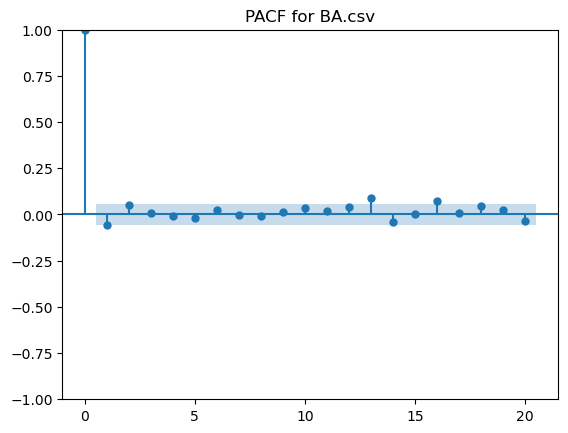

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for BA.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing file: MRK.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

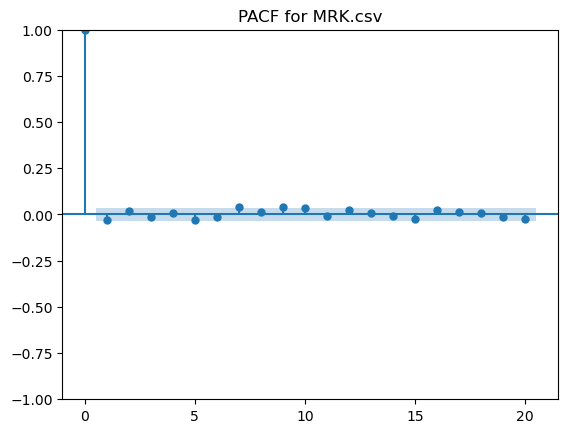

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for MRK.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing file: INTC.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

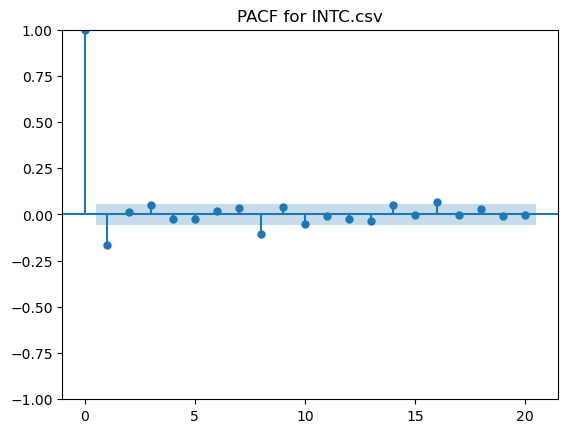

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for INTC.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing file: MSFT.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

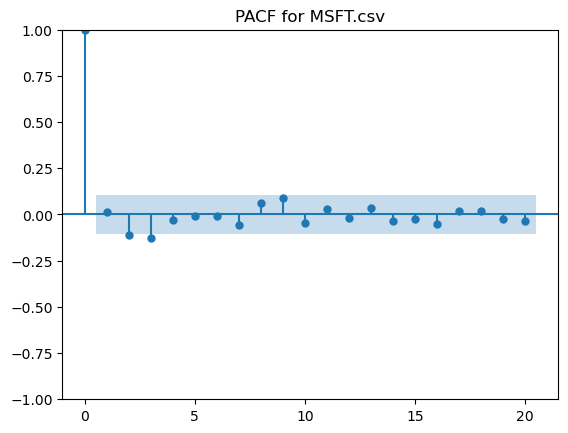

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for MSFT.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing file: AMD.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

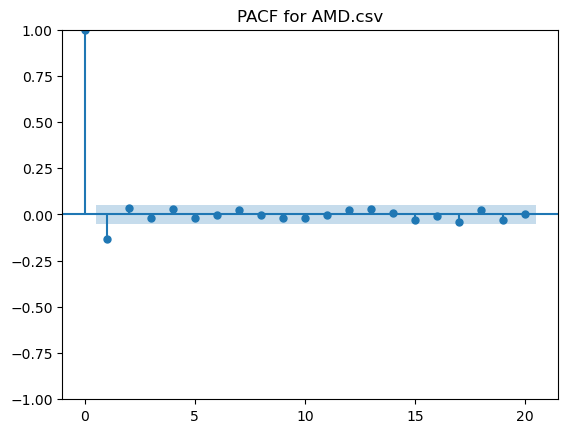

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for AMD.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing file: NVDA.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

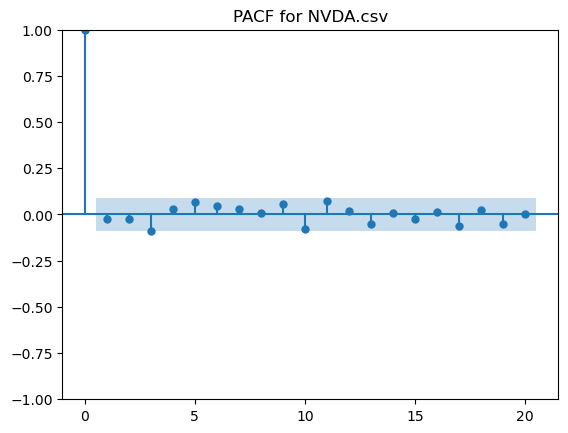

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for NVDA.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in versio

Processing file: TSLA.csv


<Figure size 1000x600 with 0 Axes>

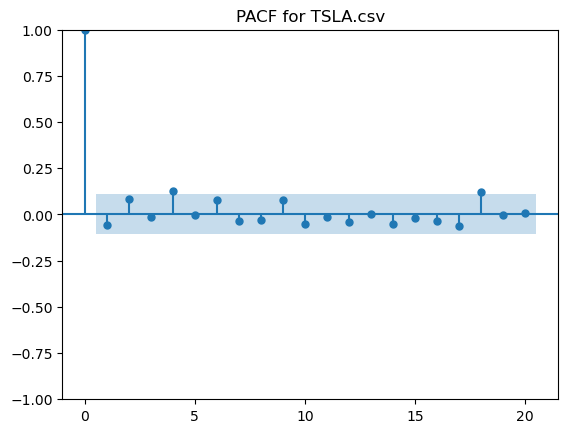

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for TSLA.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing file: GOOG.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

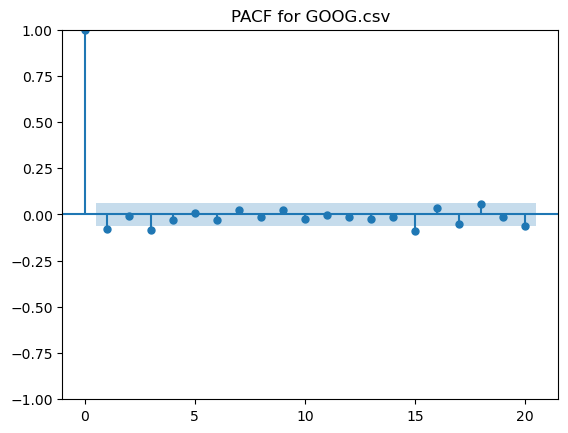

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for GOOG.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing file: AAPL.csv


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

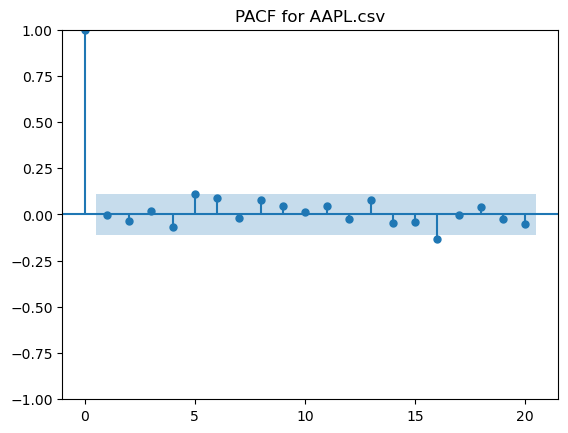

Set p and q based on PACF visualization (defaulting to 1 if undecided).
Enter the lag to set p = q for AAPL.csv: 1


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


   filename  best_rmse_with_sentiment best_order_with_sentiment  \
0    BA.csv                  0.015433                 (1, 1, 1)   
1   MRK.csv                  0.010732                 (1, 0, 1)   
2  INTC.csv                  0.021514                 (1, 0, 1)   
3  MSFT.csv                  0.012181                 (1, 0, 1)   
4   AMD.csv                  0.025889                 (1, 1, 1)   
5  NVDA.csv                  0.024025                 (1, 0, 1)   
6  TSLA.csv                  0.024209                 (1, 0, 1)   
7  GOOG.csv                  0.014757                 (1, 1, 1)   
8  AAPL.csv                  0.011087                 (1, 0, 1)   

   best_rmse_without_sentiment best_order_without_sentiment  
0                     0.015281                    (1, 1, 1)  
1                     0.010794                    (1, 0, 1)  
2                     0.021941                    (1, 0, 1)  
3                     0.012662                    (1, 0, 1)  
4                  

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from itertools import product
import matplotlib.pyplot as plt

# Define paths
filtered_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score_with_returns/'

# Function to evaluate SARIMAX models
def evaluate_sarimax(train, test, exog_train=None, exog_test=None, order=(1, 1, 1)):
    try:
        # Fit the SARIMAX model
        model = SARIMAX(train, exog=exog_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False, method='powell', maxiter=500)
        
        # Make predictions
        predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=exog_test)
        
        # Calculate RMSE for out-of-sample validation
        rmse = mean_squared_error(test, predictions, squared=False)
        return rmse, model_fit
    except Exception as e:
        print(f"Error with order {order}: {e}")
        return float("inf"), None

# Prepare lists to store results
results = []

# Iterate through each file in the filtered directory
for filename in os.listdir(filtered_dir):
    print(f"Processing file: {filename}")
    if filename.endswith('.csv'):
        # Load the data
        file_path = os.path.join(filtered_dir, filename)
        df = pd.read_csv(file_path)

        # Convert Date column to datetime and sort by Date
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date').reset_index(drop=True)
        
        # Fill NaN in sentiment_score columns with zero
        sentiment_columns = ['weighted_sentiment_score']
        df[sentiment_columns] = df[sentiment_columns].fillna(0)

        # Define features and target
        target = 'return'
        features_with_sentiment = ['open', 'volume'] + sentiment_columns
        features_without_sentiment = ['open', 'volume']

        # Prepare training and test datasets
        train_size = int(len(df) * 0.8)
        train, test = df[target][:train_size], df[target][train_size:]
        exog_train_with = df[features_with_sentiment][:train_size]
        exog_test_with = df[features_with_sentiment][train_size:]
        exog_train_without = df[features_without_sentiment][:train_size]
        exog_test_without = df[features_without_sentiment][train_size:]

        # Plot PACF to eyeball lag structure
        plt.figure(figsize=(10, 6))
        plot_pacf(train, lags=20, method='ywm')
        plt.title(f"PACF for {filename}")
        plt.show()

        # Use PACF to set p = q
        print("Set p and q based on PACF visualization (defaulting to 1 if undecided).")
        pacf_lag = int(input(f"Enter the lag to set p = q for {filename}: ") or 1)

        # Define parameter grid where p = q
        d_values = range(0, 2)
        pdq = [(pacf_lag, d, pacf_lag) for d in d_values]

        # Grid search for best SARIMAX parameters (with sentiment features)
        best_rmse_with = float("inf")
        best_order_with = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_with, exog_test=exog_test_with, order=param)
                if rmse < best_rmse_with:
                    best_rmse_with = rmse
                    best_order_with = param
            except Exception as e:
                print(f"Skipping order {param} due to error: {e}")
                continue

        # Grid search for best SARIMAX parameters (without sentiment features)
        best_rmse_without = float("inf")
        best_order_without = None
        for param in pdq:
            try:
                rmse, _ = evaluate_sarimax(train, test, exog_train=exog_train_without, exog_test=exog_test_without, order=param)
                if rmse < best_rmse_without:
                    best_rmse_without = rmse
                    best_order_without = param
            except Exception as e:
                print(f"Skipping order {param} due to error: {e}")
                continue

        # Append results for this file
        results.append({
            'filename': filename,
            'best_rmse_with_sentiment': best_rmse_with,
            'best_order_with_sentiment': best_order_with,
            'best_rmse_without_sentiment': best_rmse_without,
            'best_order_without_sentiment': best_order_without
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


In [65]:
results_df

,filename,best_rmse_with_sentiment,best_order_with_sentiment,best_rmse_without_sentiment,best_order_without_sentiment
0,BA.csv,0.015433,"(1, 1, 1)",0.015281,"(1, 1, 1)"
1,MRK.csv,0.010732,"(1, 0, 1)",0.010794,"(1, 0, 1)"
2,INTC.csv,0.021514,"(1, 0, 1)",0.021941,"(1, 0, 1)"
3,MSFT.csv,0.012181,"(1, 0, 1)",0.012662,"(1, 0, 1)"
4,AMD.csv,0.025889,"(1, 1, 1)",0.026487,"(1, 1, 1)"
5,NVDA.csv,0.024025,"(1, 0, 1)",0.022733,"(1, 0, 1)"
6,TSLA.csv,0.024209,"(1, 0, 1)",0.025057,"(1, 0, 1)"
7,GOOG.csv,0.014757,"(1, 1, 1)",0.014738,"(1, 1, 1)"
8,AAPL.csv,0.011087,"(1, 0, 1)",0.010469,"(1, 0, 1)"
